# Airbnb Data

This project looks at Airbnb Listing and Review data in Seattle 

Three questions:
1. What features relate to higher ratings
2. Which time of the year is good for business?
3. How to price appropriately? (predict price by time and features)

Data was scraped on 1/4/2016

Data of bookings (calendar.csv) ranged from 1/4/2016 to 1/2/2017

# Table of Content
1. [Initial data exploration](#heading1)
2. [Prepare data](#heading2)
(Validate data, treat missing values, feature engineer, create dummy variables for modeling)
    1. [Calendar Data set](#heading2.1)
    2. [Listing Data set](#heading2.2)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

from IPython.display import display

In [2]:
listings = pd.read_csv('./seattle/listings.csv')
calendar = pd.read_csv('./seattle/calendar.csv')
reviews = pd.read_csv('./seattle/reviews.csv')

## Explore Data <a name="heading1"></a>

In [3]:
display(listings.shape)
display(calendar.shape)
display(reviews.shape)

(3818, 92)

(1393570, 4)

(84849, 6)

In [4]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [5]:
display(calendar.columns)
display(reviews.columns)

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
calendar.sample(5)

,listing_id,date,available,price
429593,2208757,2016-12-22,f,NaN
1205368,4334804,2016-05-21,t,$450.00
1099872,3657819,2016-05-10,t,$99.00
1185670,3961077,2016-06-02,t,$48.00
511760,4783585,2016-02-03,t,$175.00


In [8]:
reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
29711,2536507,28997333,2015-04-02,2147903,Lisa,"Marian was very helpful, even before arrival, ..."
8272,1279660,12090876,2014-04-22,14020772,Alisa,this was a great find! right in the heart of ...
15150,7198282,45413525,2015-09-02,38601250,Ronald,Neil and his girlfriend are the best AIRBNB ho...
67467,6249164,34994652,2015-06-14,33787565,Alexis,"This was my first Airbnb stay, and it was abso..."
79030,3870937,38824338,2015-07-19,29579973,Edward,Ivan's place is a perfect little hideaway in a...


## Prepare Data <a name="heading2"></a>

In [9]:
# Function: Convert object to date
def to_date(df, col):
    '''
    Input: 
        df: dataframe
        col: column in string format (object) you want to convert into date
    Output:
        df: dataframe with updated column in date format. Every other columns are kept intact
    '''
    df[col] = pd.to_datetime(df[col])
    return df

# Function: Convert price object ('$12.00') to numeric value
def price_to_numeric(df, col):
    '''
    Input: 
        df: dataframe
        col: currency column in string format (object) you want to convert into numeric
    Output:
        df: dataframe with updated column in float format. Every other columns are kept intact
    '''
    df[col] = df[col].str.replace('$','')
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].astype('float')
    return df


# Function: Convert percentage ('100%') to numeric value
def perc_to_numeric(df, col):
    '''
    Input: 
        df: dataframe
        col: percentage column in string format (object) you want to convert into numeric
    Output:
        df: dataframe with updated column in float format. Every other columns are kept intact
    '''
    df[col] = df[col].str.replace('%','')
    df[col] = df[col].astype('float')
    return df

### Calendar data <a name="heading2.1"></a>


#### Data Type <a name="heading2.1.1"></a>

In [10]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [11]:
calendar_df = price_to_numeric(calendar,'price')
calendar_df = to_date(calendar, 'date')

calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [12]:
calendar_df.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

#### Missing data <a name="heading2.1.2"></a>

This data set has 30% missing values in price column in days that the listings are not available. This might be due to owners not having the place available, so the price is not listed.

An interesting thing is if the property is available for rent >60days/year, it might be illigal (as the property is converted for tourist stay purpose). I want to explore this aspect further. 

In [13]:
calendar_df.isnull().sum()/calendar.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

#### Data Exploration <a name="heading2.1.3"></a>

In [14]:
calendar_df.describe()

,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.944859
std,2.962274e+06,105.062870
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,1650.000000


In [15]:
print('date ranged from {} to {}'. format(calendar_df.date.min(), calendar_df.date.max()))

date ranged from 2016-01-04 00:00:00 to 2017-01-02 00:00:00


##### Price Trend <a name="heading2.1.4"></a>
We observe increase increase in summer months, as well as posible weekly effect on price (shown by spikes across the line)

Text(0.5, 1.0, 'Temporal effect on Price')

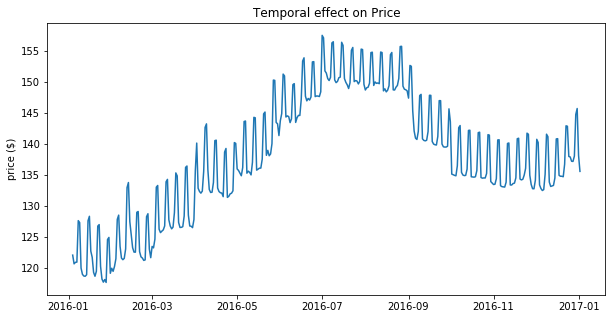

In [16]:
# Chart with avaible dates only, explore temporal effect on price 
chart_data = calendar_df.dropna()
chart_data = chart_data.groupby('date')['price'].mean().reset_index()

# Graph
plt.figure(figsize=(10,5) )
plt.plot(chart_data['date'],chart_data['price'])
plt.ylabel('price ($)')
plt.title('Temporal effect on Price')

##### Unavailable listing trend

Text(0.5, 1.0, 'Trend of Unvailable listings across time in 2016')

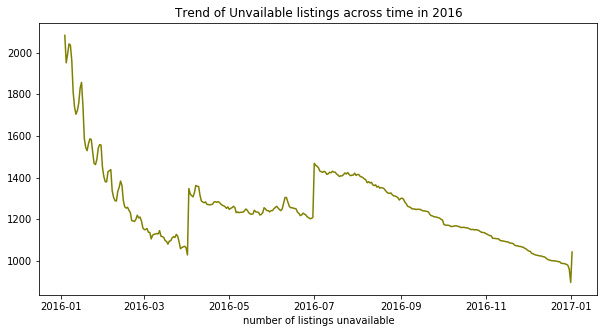

In [17]:
chart_data = calendar_df.copy()

plt.figure(figsize=(10,5) )
test = calendar_df.groupby(['date','available']).count()['listing_id'].reset_index()
test_2 = test.pivot(index='date', columns='available', values='listing_id').reset_index()
plt.plot(test_2['date'], test_2['f'], color='olive')
plt.xlabel('number of listings unavailable')
plt.title('Trend of Unvailable listings across time in 2016')

##### Unavailable days per Listings per Year count
There are way more listings that hve 60 days available, which suggest many owner are using Airbnb as professional renting place and not just "rent an extra room" like Airbnb initially is intended to be.

In [18]:
chart_data = calendar_df.copy()

# count number of days room available
avail_days = chart_data[chart_data['available']=='t'].groupby(['listing_id']).count()['date']\
    .reset_index()
# Categorize if a listing has more than 60 days available in a year
avail_days['days in a year'] = avail_days['date']\
    .apply(lambda col: 'more than 60 days' if col >=60 else 'less than 60 days')

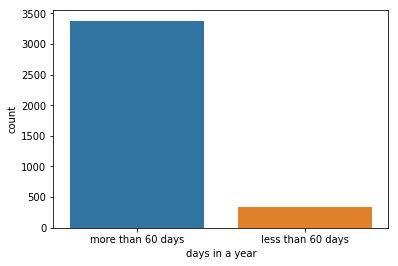

In [19]:
sns.countplot(x="days in a year", data=avail_days)

#### Make non-na df

In [20]:
calendar_df_nonull = calendar_df.dropna()

In [21]:
calendar_df_nonull.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [22]:
calendar_df_nonull.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

### Listings Data <a name="heading2.2"></a>

Output of this section:

- listing_df: Does not contain dummy variables

- listing_df_dummy: contains dummy variables to get ready for modeling

- listings_price_df: contain dummy + exclude response time, response rate

Drop columns that we do not need. We are left with 28 variables

In [22]:
cols_to_drop = ['listing_url','scrape_id','last_scraped', 'experiences_offered', 'thumbnail_url',\
                'medium_url','picture_url','xl_picture_url', 'host_url', 'host_name',\
               'host_location','host_about','host_thumbnail_url','host_picture_url', 'host_listings_count',\
               'host_verifications',  'street','host_neighbourhood', 'neighbourhood','neighbourhood_cleansed',\
               'state','country_code','country','is_location_exact','requires_license','license', \
                'market','smart_location','city','host_has_profile_pic','host_identity_verified',\
               'name','summary','space','description','neighborhood_overview','notes','transit',\
               'amenities','square_feet', 'review_scores_accuracy',\
                'review_scores_cleanliness','first_review','last_review','calendar_last_scraped',\
                'review_scores_checkin','review_scores_communication','review_scores_location',\
                'review_scores_value','weekly_price','monthly_price','security_deposit','cleaning_fee','calendar_updated',\
               'jurisdiction_names','require_guest_profile_picture','require_guest_phone_verification',\
                'calculated_host_listings_count', 'host_acceptance_rate','zipcode','instant_bookable', 'minimum_nights',\
               'maximum_nights','has_availability']
listings_df = listings.drop(columns = cols_to_drop)
listings_df.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,guests_included,extra_people,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,96%,f,3.0,Queen Anne,47.636289,-122.371025,...,2,$5.00,14,41,71,346,207,95.0,moderate,4.07
1,953595,5177328,2013-02-21,within an hour,98%,t,6.0,Queen Anne,47.639123,-122.365666,...,1,$0.00,13,13,16,291,43,96.0,strict,1.48
2,3308979,16708587,2014-06-12,within a few hours,67%,f,2.0,Queen Anne,47.629724,-122.369483,...,10,$25.00,1,6,17,220,20,97.0,strict,1.15
3,7421966,9851441,2013-11-06,NaN,NaN,f,1.0,Queen Anne,47.638473,-122.369279,...,1,$0.00,0,0,0,143,0,NaN,flexible,NaN
4,278830,1452570,2011-11-29,within an hour,100%,f,2.0,Queen Anne,47.632918,-122.372471,...,6,$15.00,30,60,90,365,38,92.0,strict,0.89


In [23]:
#Rename column
listings_df = listings_df.rename(columns={'neighbourhood_group_cleansed':'neighborhood'})

In [24]:
listings_df.shape

(3818, 28)

In [25]:
listings_df.isnull().sum()

id                             0
host_id                        0
host_since                     2
host_response_time           523
host_response_rate           523
host_is_superhost              2
host_total_listings_count      2
neighborhood                   0
latitude                       0
longitude                      0
property_type                  1
room_type                      0
accommodates                   0
bathrooms                     16
bedrooms                       6
beds                           1
bed_type                       0
price                          0
guests_included                0
extra_people                   0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating         647
cancellation_policy            0
reviews_per_month            627
dtype: int64

In [26]:
listings_df.isnull().sum()/listings_df.shape[0]

id                           0.000000
host_id                      0.000000
host_since                   0.000524
host_response_time           0.136983
host_response_rate           0.136983
host_is_superhost            0.000524
host_total_listings_count    0.000524
neighborhood                 0.000000
latitude                     0.000000
longitude                    0.000000
property_type                0.000262
room_type                    0.000000
accommodates                 0.000000
bathrooms                    0.004191
bedrooms                     0.001572
beds                         0.000262
bed_type                     0.000000
price                        0.000000
guests_included              0.000000
extra_people                 0.000000
availability_30              0.000000
availability_60              0.000000
availability_90              0.000000
availability_365             0.000000
number_of_reviews            0.000000
review_scores_rating         0.169460
cancellation

In [27]:
listings_df.describe()

,id,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
count,3.818000e+03,3.818000e+03,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3191.000000
mean,5.550111e+06,1.578556e+07,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,1.672603,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,2.078919
std,2.962660e+06,1.458382e+07,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,1.311040,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,1.822348
min,3.335000e+03,4.193000e+03,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.020000
25%,3.258256e+06,3.275204e+06,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,0.695000
50%,6.118244e+06,1.055814e+07,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,1.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,1.540000
75%,8.035127e+06,2.590309e+07,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,2.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,3.000000
max,1.034016e+07,5.320861e+07,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,15.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,12.150000


#### Clean Data type

In [28]:
listings_df.dtypes

id                             int64
host_id                        int64
host_since                    object
host_response_time            object
host_response_rate            object
host_is_superhost             object
host_total_listings_count    float64
neighborhood                  object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
price                         object
guests_included                int64
extra_people                  object
availability_30                int64
availability_60                int64
availability_90                int64
availability_365               int64
number_of_reviews              int64
review_scores_rating         float64
cancellation_policy           object
r

In [29]:
# Edit data type of these 4 columns
listings_df = to_date(listings_df, 'host_since')
listings_df = perc_to_numeric(listings_df, 'host_response_rate')
listings_df = price_to_numeric(listings_df, 'price')
listings_df = price_to_numeric(listings_df, 'extra_people')

#### Missing data

Missing reviews per months are in listing ID that did not receive any review. I will impute 0 for reviews_per_month

In [30]:
listings_df['reviews_per_month'].fillna(0, inplace = True)
listings_df['reviews_per_month'].head()

0    4.07
1    1.48
2    1.15
3    0.00
4    0.89
Name: reviews_per_month, dtype: float64

Similarly, missing reviews score are in listing ID that did not receive any review. I will impute 0 for review_scores_rating

In [31]:
listings_df['review_scores_rating'].fillna(0, inplace = True)
listings_df['review_scores_rating'].head()

0    95.0
1    96.0
2    97.0
3     0.0
4    92.0
Name: review_scores_rating, dtype: float64

In [32]:
listings_df.isnull().sum()

id                             0
host_id                        0
host_since                     2
host_response_time           523
host_response_rate           523
host_is_superhost              2
host_total_listings_count      2
neighborhood                   0
latitude                       0
longitude                      0
property_type                  1
room_type                      0
accommodates                   0
bathrooms                     16
bedrooms                       6
beds                           1
bed_type                       0
price                          0
guests_included                0
extra_people                   0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
cancellation_policy            0
reviews_per_month              0
dtype: int64

In [33]:
listings_df[listings_df['host_response_time'].isnull()]

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighborhood,latitude,longitude,...,guests_included,extra_people,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
3,7421966,9851441,2013-11-06,NaN,NaN,f,1.0,Queen Anne,47.638473,-122.369279,...,1,0.0,0,0,0,143,0,0.0,flexible,0.00
5,5956968,326758,2010-12-25,NaN,NaN,f,1.0,Queen Anne,47.630525,-122.366174,...,1,30.0,0,0,27,302,17,95.0,strict,2.45
8,4948745,2166277,2012-04-18,NaN,NaN,f,1.0,Queen Anne,47.632410,-122.357216,...,1,0.0,6,36,66,341,8,97.0,strict,1.22
18,7735464,6170760,2013-04-30,NaN,NaN,f,1.0,Queen Anne,47.639776,-122.372235,...,1,0.0,0,0,0,125,0,0.0,flexible,0.00
19,6291829,32713558,2015-05-05,NaN,NaN,f,1.0,Queen Anne,47.636025,-122.358694,...,1,0.0,24,54,84,359,5,85.0,flexible,0.82
23,10106055,51860756,2015-12-20,NaN,NaN,f,1.0,Queen Anne,47.633394,-122.371920,...,1,0.0,30,60,90,365,0,0.0,flexible,0.00
24,6362362,33147763,2015-05-11,NaN,NaN,f,1.0,Queen Anne,47.638517,-122.369581,...,1,0.0,0,0,0,212,1,100.0,moderate,0.18
42,1392332,2315558,2012-05-07,NaN,NaN,f,1.0,Queen Anne,47.638686,-122.370800,...,4,0.0,0,3,33,308,41,98.0,moderate,1.38
48,5383192,27606550,2015-02-11,NaN,NaN,f,1.0,Queen Anne,47.639332,-122.361599,...,2,25.0,0,0,20,295,1,100.0,moderate,0.16
52,7714294,3521823,2012-09-10,NaN,NaN,f,2.0,Queen Anne,47.631753,-122.371272,...,2,20.0,0,0,28,303,3,100.0,moderate,0.64


#### Categorical Variable Treatment

Summary:
- Host_since: translate into days_hosted
- Host response time: translate into numeric value (1-2-3-4)
- Cancellation policy:  translate into numeric value (1-2-3)
- Variables that are made into Dummy variables: property type, room type, neighborhood

Output of this section: 

listing_df: Does not contain dummy variables

listing_df_dummy: contains dummy variables to get ready for modeling

***Days Hosted*** from host_since, calculate how many days that host has been renting their property

In [34]:
listings_df['days_hosted'] = (pd.to_datetime('2016-01-04') - listings_df['host_since']).astype('timedelta64[D]')
listings_df.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighborhood,latitude,longitude,...,extra_people,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,days_hosted
0,241032,956883,2011-08-11,within a few hours,96.0,f,3.0,Queen Anne,47.636289,-122.371025,...,5.0,14,41,71,346,207,95.0,moderate,4.07,1607.0
1,953595,5177328,2013-02-21,within an hour,98.0,t,6.0,Queen Anne,47.639123,-122.365666,...,0.0,13,13,16,291,43,96.0,strict,1.48,1047.0
2,3308979,16708587,2014-06-12,within a few hours,67.0,f,2.0,Queen Anne,47.629724,-122.369483,...,25.0,1,6,17,220,20,97.0,strict,1.15,571.0
3,7421966,9851441,2013-11-06,NaN,NaN,f,1.0,Queen Anne,47.638473,-122.369279,...,0.0,0,0,0,143,0,0.0,flexible,0.00,789.0
4,278830,1452570,2011-11-29,within an hour,100.0,f,2.0,Queen Anne,47.632918,-122.372471,...,15.0,30,60,90,365,38,92.0,strict,0.89,1497.0


In [35]:
# Drop original host_since
listings_df.drop(columns = ['host_since'], inplace = True)

***Host_response_time*** Convert this variable into numeric value

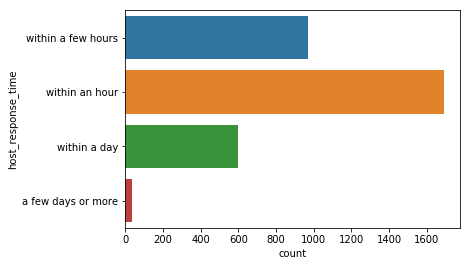

In [36]:
sns.countplot(y='host_response_time', data =  listings_df)

In [37]:
listings_df['host_response_time'].head()

0    within a few hours
1        within an hour
2    within a few hours
3                   NaN
4        within an hour
Name: host_response_time, dtype: object

In [38]:
listings_df['host_response_time']\
    .replace(['within an hour','within a few hours','within a day', 'a few days or more'],\
                (1, 2, 3, 4), \
                inplace = True)
listings_df['host_response_time'].head()

0    2.0
1    1.0
2    2.0
3    NaN
4    1.0
Name: host_response_time, dtype: float64

***Cancellation policy:*** Convert this variable into numeric value

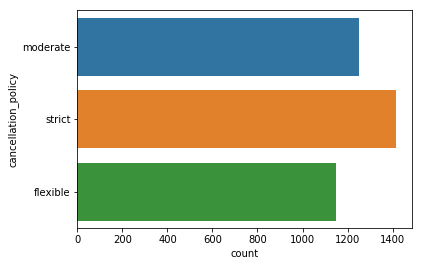

In [39]:
sns.countplot(y='cancellation_policy', data =  listings_df)

In [40]:
listings_df['cancellation_policy'].head()

0    moderate
1      strict
2      strict
3    flexible
4      strict
Name: cancellation_policy, dtype: object

In [41]:
listings_df['cancellation_policy']\
    .replace(['flexible','moderate','strict'],\
                (1, 2, 3), \
                inplace = True)
listings_df['cancellation_policy'].head()

0    2
1    3
2    3
3    1
4    3
Name: cancellation_policy, dtype: int64

***Make dummy variable: neighborhood, proterty type, room type***

In [42]:
# Function that make dummy + add to the original df
def make_dummy(df, col):
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(columns = col, axis = 1) #drop original column
    return df

***Neighborhood:***

Make dummies variable for this feature after dividing neighborhoods into high-priced and low-priced neighborhood (new variable: neighborhood_type)

*Observation*: There are too many neighborhoods that might make each group contains too few observations for prediction. Therefore, I will group into 2 neighborhood groups
- neighborhood price high: average rental price >=$100

- neighborhood price low: average rental price <$100

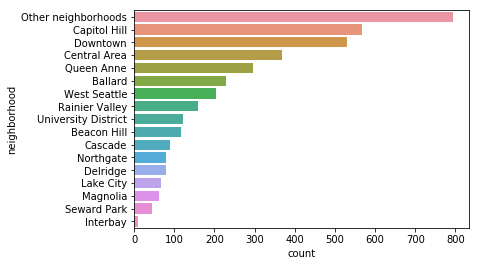

In [43]:
# Count listings in each neighbor
sns.countplot(y='neighborhood', data =  listings_df,\
              order=listings_df['neighborhood'].value_counts().index)

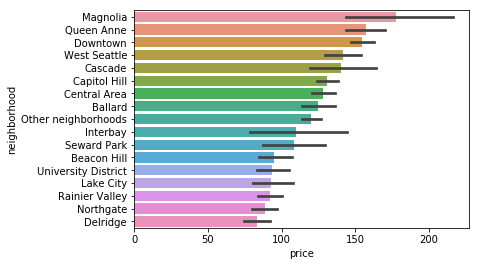

In [44]:
sns.barplot(y = 'neighborhood', x = 'price', data =  listings_df, 
            order=listings_df.groupby('neighborhood')['price'].mean().sort_values(ascending=False).index)


In [45]:
# Make lowhigh_cat df that contains information about neighborhood type based on average price 
lowhigh_cat = (listings_df.groupby('neighborhood')['price'].mean() >=100).reset_index()

lowhigh_cat.rename(columns = {'price': 'neighborhood_type'}, inplace = True)

# change label
lowhigh_cat['neighborhood_type'] = lowhigh_cat['neighborhood_type']\
    .apply(lambda var: 'high price' if var == True else 'low price')

In [46]:
listings_df = listings_df.merge(lowhigh_cat, how = 'left', on  ='neighborhood')

***Bed type:***

Make dummies variable for this feature after dividing bed type into Real bed and Other

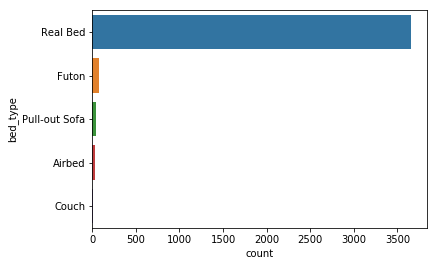

In [47]:
# Count listings in each bed type
sns.countplot(y='bed_type', data =  listings_df,\
              order=listings_df['bed_type'].value_counts().index)

In [48]:
listings_df['bed_type'] = listings_df['bed_type']\
    .apply(lambda col: "Real Bed" if col == 'Real Bed' else "Other")

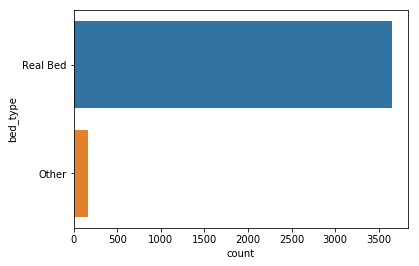

In [49]:
# Count listings in each bed type
sns.countplot(y='bed_type', data =  listings_df,\
              order=listings_df['bed_type'].value_counts().index)

***Room_type*** make dummy variable

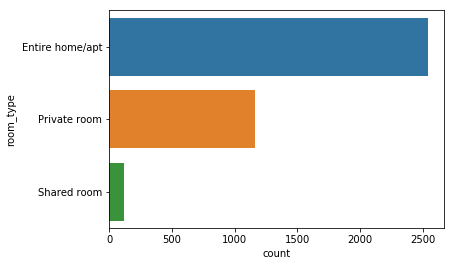

In [50]:
sns.countplot(y='room_type', data =  listings_df,\
              order=listings_df['room_type'].value_counts().index)

***Property_type:*** 
There are so many types of property that if we make dummies for them all, we will have the dimension problem. Therefore, I will groups property that are not House and Apartment into one Other group

Then, we will make dummy variable out of Proterty type

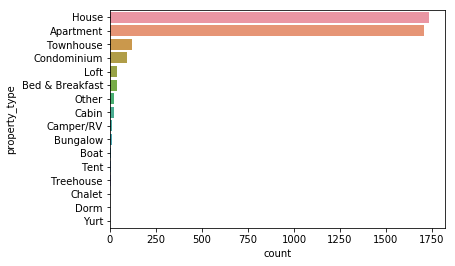

In [51]:
sns.countplot(y='property_type', data =  listings_df,\
              order=listings_df['property_type'].value_counts().index)

In [52]:
listings_df['property_type'] = listings_df['property_type']\
    .apply(lambda col: "House" if col == 'House' else ("Apartment" if col =="Apartment" else "Other"))

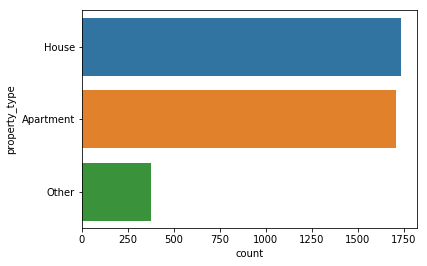

In [53]:
sns.countplot(y='property_type', data =  listings_df,\
              order=listings_df['property_type'].value_counts().index)

***Make of Dummy Columns***

Make dummy columns out of 'neighborhood_type', 'bed_type', 'property_type', 'room_type'

In [54]:
# Make dummy variable
listings_df_dummy = make_dummy(listings_df, ['neighborhood_type', 'bed_type', 'property_type', 'room_type'])

In [55]:
# Make list of columns we made dummy out of them to keep track for modeling
listings_df_dummy.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighborhood,latitude,longitude,accommodates,...,neighborhood_type_high price,neighborhood_type_low price,bed_type_Other,bed_type_Real Bed,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,241032,956883,2.0,96.0,f,3.0,Queen Anne,47.636289,-122.371025,4,...,1,0,0,1,1,0,0,1,0,0
1,953595,5177328,1.0,98.0,t,6.0,Queen Anne,47.639123,-122.365666,4,...,1,0,0,1,1,0,0,1,0,0
2,3308979,16708587,2.0,67.0,f,2.0,Queen Anne,47.629724,-122.369483,11,...,1,0,0,1,0,1,0,1,0,0
3,7421966,9851441,NaN,NaN,f,1.0,Queen Anne,47.638473,-122.369279,3,...,1,0,0,1,1,0,0,1,0,0
4,278830,1452570,1.0,100.0,f,2.0,Queen Anne,47.632918,-122.372471,6,...,1,0,0,1,0,1,0,1,0,0


### Make final data sets

#### Separate listings_df into 2 df (listings_price and listings_review) for modeling

I can't find any pattern that explains for missing values in host_response_time and host_response_rate. At first, I suspected that these host did not have having customers, therefore, there is no contact that require responses. However, many of them did hosted people and have reviews.

I decided to separate this listings df into 2 df. One is to answer questions about host behaviors-ratings, one is to answer the question about pricing of a rental. By doing this, we do not lose a lot data to find answers for the Price question, because host response behavior might explain less about a rental's price than the rental's location and features.

In [56]:
listings_df.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count', 'neighborhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'extra_people', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'cancellation_policy', 'reviews_per_month', 'days_hosted',
       'neighborhood_type'],
      dtype='object')

In [57]:
listings_df_dummy.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count', 'neighborhood',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'extra_people', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'reviews_per_month', 'days_hosted', 'neighborhood_type_high price',
       'neighborhood_type_low price', 'bed_type_Other', 'bed_type_Real Bed',
       'property_type_Apartment', 'property_type_House', 'property_type_Other',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [58]:
# To best model for Price, we drop 'host_response_time' and 'host_response_rate' columns
listings_df_price = listings_df_dummy[['id', 'host_id', 
       'host_is_superhost', 'host_total_listings_count', 'neighborhood',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'extra_people', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'reviews_per_month', 'days_hosted', 'neighborhood_type_high price',
       'neighborhood_type_low price', 'bed_type_Other', 'bed_type_Real Bed',
       'property_type_Apartment', 'property_type_House', 'property_type_Other',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room']]

In [59]:
listings_df_price.head(1)

,id,host_id,host_is_superhost,host_total_listings_count,neighborhood,latitude,longitude,accommodates,bathrooms,bedrooms,...,neighborhood_type_high price,neighborhood_type_low price,bed_type_Other,bed_type_Real Bed,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,241032,956883,f,3.0,Queen Anne,47.636289,-122.371025,4,1.0,1.0,...,1,0,0,1,1,0,0,1,0,0


#### Make combined data frame: listing + calendar

Input:
- calendar_df_nonull
- listings_df_price

Output: 
- joined_calendar_listings

In [60]:
print('calendar_df_nonull has {} rows and {} columns'.format(calendar_df_nonull.shape[0], calendar_df_nonull.shape[1]))

print('listings_df_price df has {} rows and {} columns'.format(listings_df_price.shape[0], listings_df_price.shape[1]))

calendar_df_nonull has 934542 rows and 4 columns
listings_df_price df has 3818 rows and 33 columns


In [61]:
joined_calendar_listings_dummy = calendar_df_nonull.merge(listings_df_price, how = 'left',\
                                                    left_on = 'listing_id', right_on = 'id')

In [62]:
joined_calendar_listings_dummy.shape

(934542, 37)

In [63]:
joined_calendar_listings_dummy.rename(columns={'price_x':'price_calendar'}, inplace = True)

In [64]:
joined_calendar_listings_dummy.head(5)

,listing_id,date,available,price_calendar,id,host_id,host_is_superhost,host_total_listings_count,neighborhood,latitude,...,neighborhood_type_high price,neighborhood_type_low price,bed_type_Other,bed_type_Real Bed,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,241032,2016-01-04,t,85.0,241032,956883,f,3.0,Queen Anne,47.636289,...,1,0,0,1,1,0,0,1,0,0
1,241032,2016-01-05,t,85.0,241032,956883,f,3.0,Queen Anne,47.636289,...,1,0,0,1,1,0,0,1,0,0
2,241032,2016-01-13,t,85.0,241032,956883,f,3.0,Queen Anne,47.636289,...,1,0,0,1,1,0,0,1,0,0
3,241032,2016-01-14,t,85.0,241032,956883,f,3.0,Queen Anne,47.636289,...,1,0,0,1,1,0,0,1,0,0
4,241032,2016-01-18,t,85.0,241032,956883,f,3.0,Queen Anne,47.636289,...,1,0,0,1,1,0,0,1,0,0


#### Similar to above, but join listings_df (no dummy) and calendar df

Just so I can visualize data in EDA file

In [65]:
joined_calendar_listings = calendar_df_nonull.merge(listings_df, how = 'left',\
                                                    left_on = 'listing_id', right_on = 'id')

joined_calendar_listings.rename(columns={'price_x':'price_calendar'}, inplace = True)

In [66]:
joined_calendar_listings.head(5)

,listing_id,date,available,price_calendar,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,days_hosted,neighborhood_type
0,241032,2016-01-04,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price
1,241032,2016-01-05,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price
2,241032,2016-01-13,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price
3,241032,2016-01-14,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price
4,241032,2016-01-18,t,85.0,241032,956883,2.0,96.0,f,3.0,...,14,41,71,346,207,95.0,2,4.07,1607.0,high price


## Export


In [67]:
listings_df.to_csv('./treated_data/listings_df.csv')
listings_df_dummy.to_csv('./treated_data/listings_df_dummy.csv')
listings_df_price.to_csv('./treated_data/listings_df_price.csv')
joined_calendar_listings.to_csv('./treated_data/joined_calendar_listings.csv')
joined_calendar_listings_dummy.to_csv('./treated_data/joined_calendar_listings_dummy.csv')